<a href="https://colab.research.google.com/github/WaiYongF/AB_Testing/blob/main/A_B_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is A/B test ?

A/B test is an experiment to compare the two versions of a variable to find out which performs better in a controlled environment.

![A/B Test Diagram](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/09/ab_test.png)


It is a **hypothetical testing** methodology for making decisions that estimate population parameters based on sample statistics. The **population** refers to all the customers buying your product, while the **sample** refers to the number of customers that participated in the test.

# How does A/B test works ?

1. Define Objective

- Objective: check which newsletter brings higher traffic on the website
- Translate into quantifiable variable: i.e the conversion rate

2. Make a Hypothesis

- `Null hypothesis` and the `alternative hypothesis`
- Alternative hypothesis, Ha, is what you might hope that your A/B test will prove to be true

i.e. Alternative hypothesis: the conversion rate of newsletter B is higher than those who receive newsletter A

3. Create Control Group and Test Group

- The `Control group`: the one that will receive newsletter A
- The `Test (variant) group`: the one that will receive newsletter B
- Steps:

  a. `Random sampling`: randomly selecting the sample from the population, `to eliminate bias`

  b. `Determine sample size`: determine the minimum sample size for our A/B test before conducting it so that we can `eliminate under coverage bias`

4. Conduct the A/B Test and Collect the Data


## Various stages of A/B testing:
- Designing the Test:
  - formulate a clear hypothesis and define the metric for success.
  - determine the sample size needed for statistical significance.
- Building the Experiment:
  - may develop tools to randomly assign users to groups and ensure proper delivery of variations.
- Data Analysis:
  - employ statistical methods to analyze the collected data and assess the validity of the results. This involves techniques like hypothesis testing and p-value calculations to determine if the observed difference is due to chance or a genuine effect of the variation.
- Interpretation and Recommendation:
  - interpret the results by considering statistical significance and effect size.
  - recommend keeping the winning variation, refining the test, or concluding the experiment.

## Statistical significance of the Test

### Main question: Can we conclude from here that the Test group is working better than the control group?

For rejecting our null hypothesis we have to prove the Statistical significance of our test.

Two types of error may occur in hypothesis testing:
1. ***Type I error***: We reject the null hypothesis when it is true. That is we accept the variant B when it is not performing better than A
2. ***Type II error***: We failed to reject the null hypothesis when it is false. It means we conclude variant B is not good when it performs better than A

To avoid these errors we must calculate the statistical significance of our test.

`An experiment is considered to be statistically significant when we have enough evidence to prove that the result we see in the sample also exists in the population.`

`The two–sample t–test is one of the most commonly used hypothesis tests.`

![Probability & Statistical Significance Explained](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/09/p-value.png)

There are a few terms in A/B Test:

1. `Significance level (alpha)`: The significance level, also denoted as alpha or α, is the probability of rejecting the null hypothesis when it is true. `Generally, we use the significance value of 0.05`

2. `P-Value`: It is the probability that the difference between the two values is just because of random chance. P-value is evidence against the null hypothesis. `The smaller the p-value stronger the chances to reject the H0.` For the significance level of 0.05, `if the p-value is lesser than it hence we can reject the null hypothesis`

3. `Confidence interval`: The confidence interval is an observed range in which a given percentage of test outcomes fall. We manually select our desired confidence level at the beginning of our test. `Generally, we take a 95% confidence interval`

### ***T-Statistic Formula***

![T-Statistic](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/09/test_sta.png)

   Day   Conversion_A  Conversion_B
0     1          0.15          0.19
1     2          0.12          0.20
2     3          0.18          0.18
3     4          0.19          0.22
4     5          0.17          0.19


/tmp/ipython-input-1-3442847908.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Conversion_A)


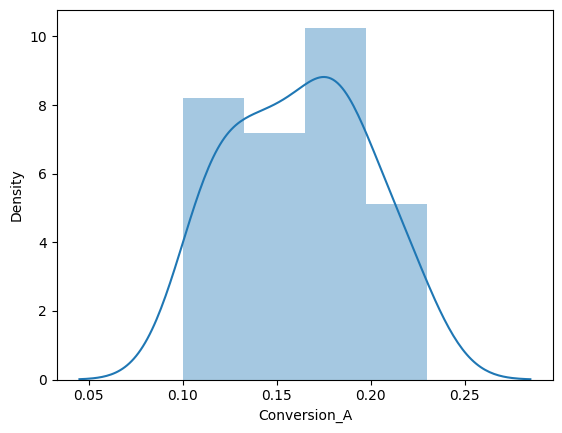

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt
data= pd.read_csv("https://raw.githubusercontent.com/WaiYongF/AB_Testing/refs/heads/main/data.csv")
print(data.head())

# Let’s plot the distribution of target and control group:

sns.distplot(data.Conversion_A)
plt.show()

In [ ]:
t_stat, p_val= ss.ttest_ind(data.Conversion_B,data.Conversion_A)
t_stat , p_val

(np.float64(3.787367930919289), np.float64(0.00036379601282876257))

For our example, the observed value i.e the mean of the test group is 0.19. The hypothesized value (Mean of the control group) is 0.16. On the calculation of the t-score, we get the t-score as .3787. and the p-value is 0.00036.

Here, our p-value is lesser than the significance level i.e 0.05. Hence, we can reject the null hypothesis. This means that in our A/B testing, newsletter B is performing better than newsletter A. So our recommendation would be to replace our current newsletter with B to bring more traffic on our website.